###### This is a simple demonstration of predicting employee attrition using Decision Tree alogoritm. Source of data is Kaggle.com

In [65]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Below are few column value interpretations

A)Education
    1 Below College 2 College 3 Bachelor 4 Master 5 Doctor
B)EnvironmentSatisfaction
    1 Low 2 Medium 3 High 4 Very High
C)JobInvolvement
    1 Low 2 Medium 3 High 4 Very High
D)JobSatisfaction
    1 Low 2 Medium 3 High 4 Very High
E)PerformanceRating
    1 Low 2 Good 3 Excellent 4 Outstanding
F)RelationshipSatisfaction
    1 Low 2 Medium 3 High 4 Very High
G)WorkLifeBalance
    1 Bad 2 Good 3 Better 4 Best

In [15]:
#create a data frame using csv file.
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [66]:
# shorten department names
def dept_name(dname):
    if dname == 'Research & Development':
        return 'R&D'
    elif dname == 'Human Resources':
        return 'HR'
    elif dname == 'Sales':
        return 'SALES'
df['Department'] = df['Department'].apply(dept_name)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_Range
0,41,Yes,Travel_Rarely,1102,None,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,31-45
1,49,No,Travel_Frequently,279,None,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46-60
2,37,Yes,Travel_Rarely,1373,None,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,31-45


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [18]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

###### Perform Exploratory Data Analysis to find patterns in data and elicit meaning of data. Two set of  charts are created. First chart shows count of employees in each department and second chart shows count of employees in age groups

Text(0.5, 0, 'Age Range')

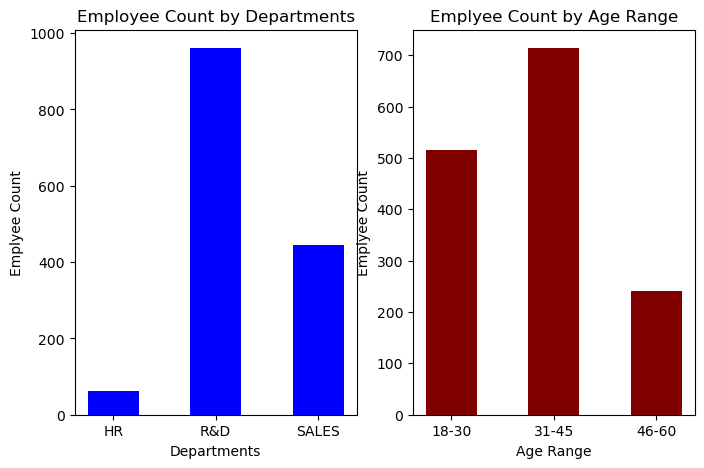

In [20]:
df1 = pd.DataFrame(df.groupby('Department')['EmployeeNumber'].count())
df1.rename(columns={'EmployeeNumber':'Emp Count'},inplace=True)
df2 = df1.reset_index()

df['Age_Range'] = pd.cut(df['Age'],bins=3,labels=['18-30','31-45','46-60'])
df3 = pd.DataFrame(df.groupby('Age_Range')['EmployeeNumber'].count()).reset_index()
df3.rename(columns={'EmployeeNumber':'Emp Count'},inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
scatter1 = ax1.bar(df2['Department'],df2['Emp Count'],width = 0.5,color ='blue') 
ax1.set_title('Employee Count by Departments')
ax1.set_ylabel('Emplyee Count')
ax1.set_xlabel('Departments')
scatter2 = ax2.bar(df3['Age_Range'],df3['Emp Count'],width = 0.5,color ='maroon') 
ax2.set_title('Emplyee Count by Age Range')
ax2.set_ylabel('Emplyee Count')
ax2.set_xlabel('Age Range')

###### Below chart chart shows age group wise attrition in each department 

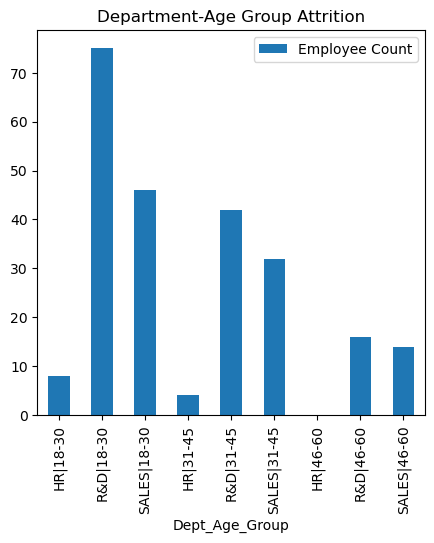

In [30]:
df['Age_Range'] = pd.cut(df['Age'],bins=3,labels=['18-30','31-45','46-60'])
df5 = pd.DataFrame(df.groupby(['Age_Range','Attrition','Department'])['EmployeeNumber'].count()).reset_index()
df6 = df5.loc[(df5['Attrition'] == 'Yes')]
df7 = df6[['Age_Range','Department','EmployeeNumber']]
df7['Dept_Age_Group'] =  df7[['Department', 'Age_Range']].agg('|'.join, axis=1)
df7.rename(columns={'EmployeeNumber':'Employee Count'},inplace=True)
df7.plot(x="Dept_Age_Group", y=["Age_Range","Employee Count"],kind="bar", figsize=(5, 5))
plt.title('Department-Age Group Attrition')
plt.show()

###### ML alogorithms need numerical data to build model.Convert categorical data to numerical data using Label encoder and one hot encoding. Columns that were converted are Attrition,Gender and Department

In [57]:
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.simplefilter(action='ignore')
df100 = df[['Age','Attrition','Department','DistanceFromHome','Gender','JobSatisfaction',
            'PercentSalaryHike','WorkLifeBalance','YearsSinceLastPromotion']]
le_attrition = LabelEncoder()
df100['Attrition_YN'] = le_attrition.fit_transform(df100['Attrition'])
one_df100 = pd.get_dummies(df100,columns=['Gender','Department'],dtype=int)
one_df200 = one_df100.drop('Attrition',axis='columns')
one_df200.head(5)

,Age,DistanceFromHome,JobSatisfaction,PercentSalaryHike,WorkLifeBalance,YearsSinceLastPromotion,Attrition_YN,Gender_Female,Gender_Male,Department_HR,Department_R&D,Department_SALES
0,41,1,4,11,1,0,1,1,0,0,0,1
1,49,8,2,23,3,1,0,0,1,0,1,0
2,37,2,3,15,3,0,1,0,1,0,1,0
3,33,3,3,11,3,3,0,1,0,0,1,0
4,27,2,2,12,3,2,0,0,1,0,1,0


###### Build model using Decision Tree from sklear library and calculate accuracy of the model using score

In [60]:
target = one_df200['Attrition_YN']
input = one_df200.drop('Attrition_YN',axis='columns')
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(input,target)

DecisionTreeClassifier()

In [62]:
model.score(input,target)

1.0

###### Create test data and test model

In [63]:
test_input = {
'Age':[22,40,55],
'DistanceFromHome':[5,15,22],
'JobSatisfaction':[3,3,2],
'PercentSalaryHike':[5,20,10],
'WorkLifeBalance':[2,2,3],
'YearsSinceLastPromotion':[0,5,10],
'Gender_Female':[0,1,0],
'Gender_Male':[1,0,1],
'Department_HR':[0,1,0],
'Department_R&D':[1,0,0],
'Department_SALES':[0,0,1]
}
df_test = pd.DataFrame(test_input)
df_test

,Age,DistanceFromHome,JobSatisfaction,PercentSalaryHike,WorkLifeBalance,YearsSinceLastPromotion,Gender_Female,Gender_Male,Department_HR,Department_R&D,Department_SALES
0,22,5,3,5,2,0,0,1,0,1,0
1,40,15,3,20,2,5,1,0,1,0,0
2,55,22,2,10,3,10,0,1,0,0,1


In [64]:
model.predict(df_test)

array([1, 0, 0])